In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

#### 1. Data

In [2]:
# n_samples=700
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [4]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


Dane nie są liniowo separowalne


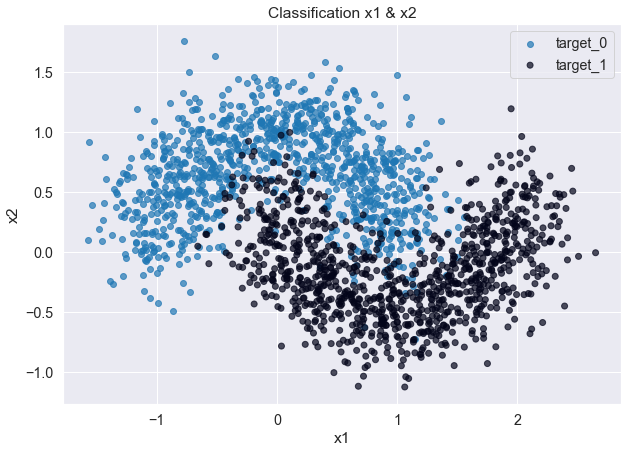

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(df[df['target'] == 0]['x1'], df[df['target'] == 0]['x2'], alpha=0.7, c='tab:blue',label='target_0')
plt.scatter(df[df['target'] == 1]['x1'], df[df['target'] == 1]['x2'], alpha=0.7, c=df[df['target'] == 1]['target'],label='target_1')
plt.title('Classification x1 & x2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2');
print('Dane nie są liniowo separowalne')

#### 2. Podział danych train/test

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1400, 2)
X_test shape: (600, 2)
y_train shape: (1400,)
y_test shape: (600,)


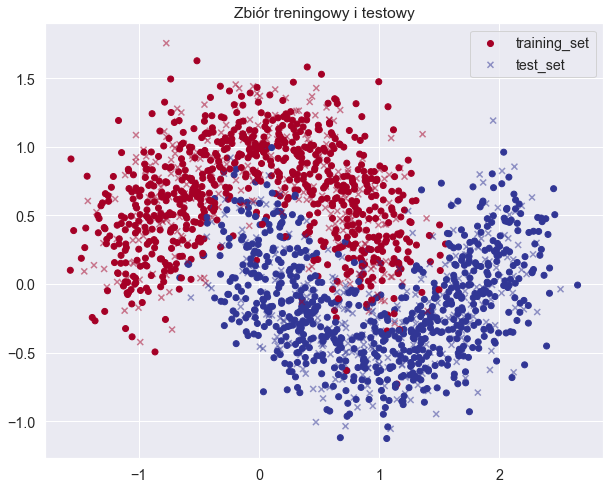

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

#### 3. Regresja logistyczna - model niedouczony

In [92]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

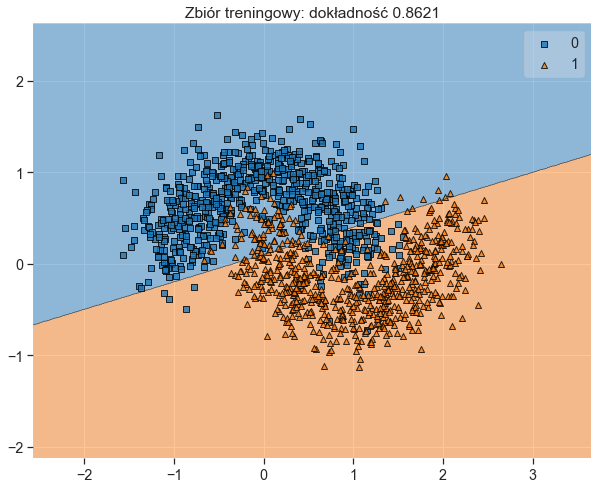

In [93]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

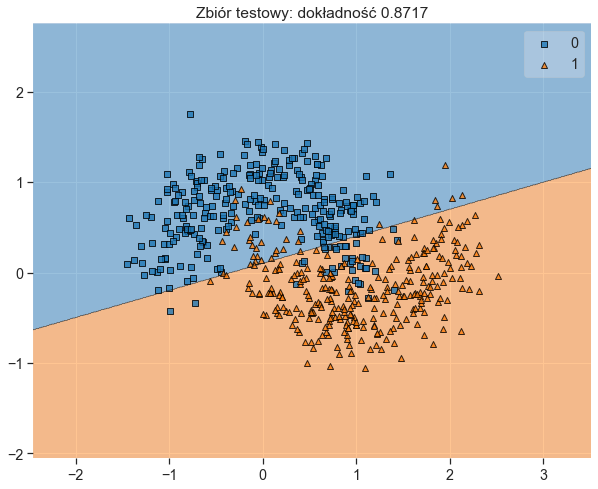

In [94]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

#### 4. Regresja drzew decyzyjnych- model niedouczony

In [95]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

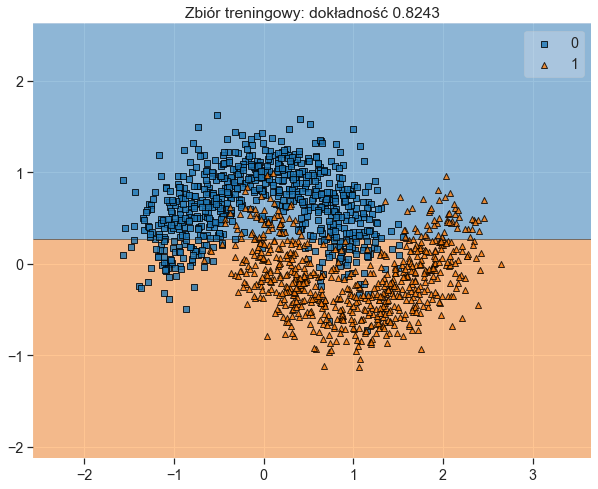

In [96]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

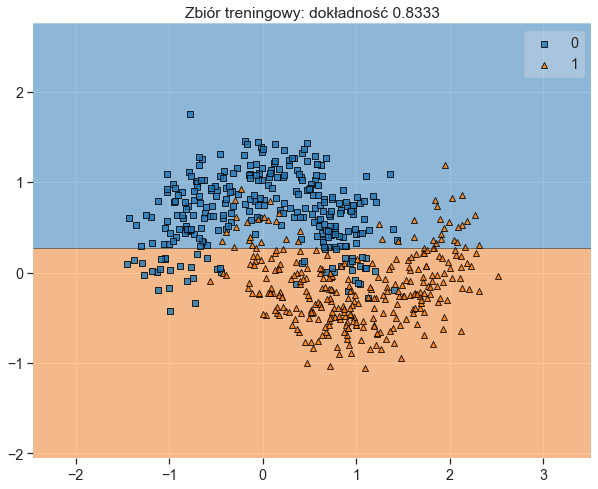

In [98]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

#### 5. Decision Trees - przeuczenie

In [142]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 6)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

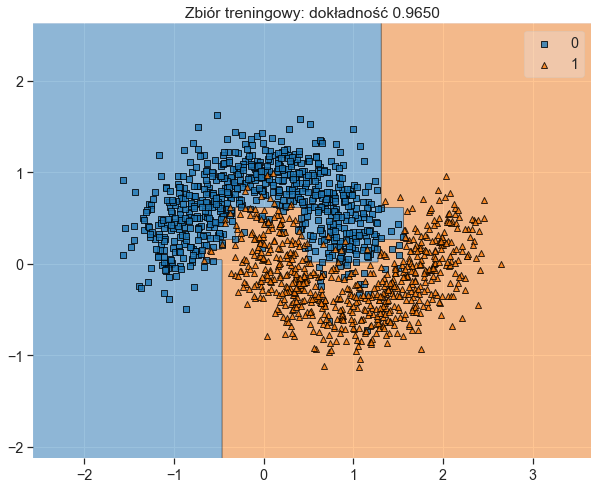

In [143]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

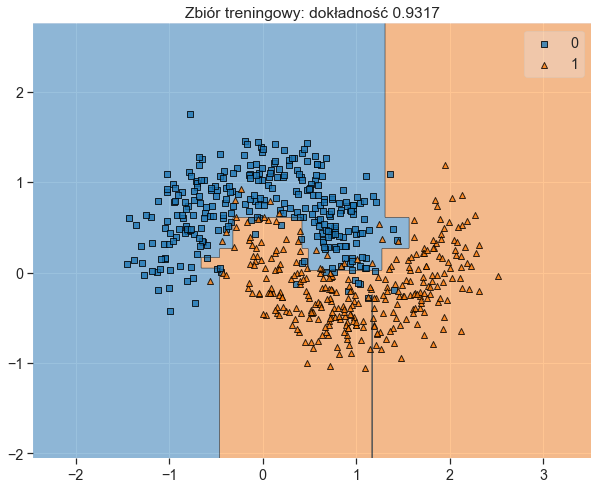

In [144]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

In [187]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=11, n_estimators= 100, criterion='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11)

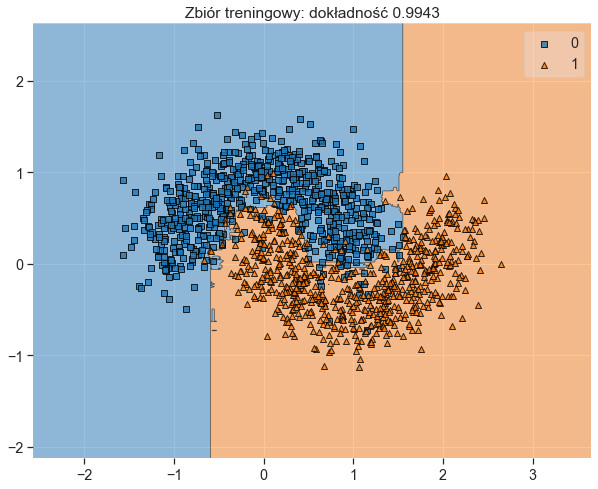

In [188]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()